# This Python Program Provides EDA for U.S Hospital Dataset

In [2]:
## Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

## Reset working dir
os.chdir('/Users/haoshu/Python_Training/US_Hospital_EDA')

os.getcwd()

dirname = os.getcwd()

print(dirname)


/Users/haoshu/Python_Training/US_Hospital_EDA


Import US hospital dataset (2016-2020)

In [3]:
## Import dataset 
data = pd.read_excel(os.path.join(dirname, "Hospital_General_Information_2016_2020.xlsx"),
                     sheet_name="Data",engine="openpyxl")

data.head()



,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Year
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,2020
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,2020
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,2020
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,2020
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,NaN,Not Available,16,Same as the national average,NaN,Above the national average,NaN,Not Available,5,2020


In [3]:
## get info of this hospital dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25082 entries, 0 to 25081
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Facility ID                                                    25082 non-null  object
 1   Facility Name                                                  25082 non-null  object
 2   Address                                                        25082 non-null  object
 3   City                                                           25082 non-null  object
 4   State                                                          25082 non-null  object
 5   ZIP Code                                                       25082 non-null  int64 
 6   County Name                                                    25037 non-null  object
 7   Phone Number                                                   2508

In [17]:
print(data['Year'].value_counts())
print(' ')
print(data['Hospital Type'].value_counts())
print(' ')
print(data['Hospital Ownership'].value_counts())

2019    5344
2020    5326
2017    4812
2016    4807
2018    4793
Name: Year, dtype: int64
 
Acute Care Hospitals                  16665
Critical Access Hospitals              6742
Psychiatric                            1154
Childrens                               486
Acute Care - Department of Defense       35
Name: Hospital Type, dtype: int64
 
Voluntary non-profit - Private                 10624
Proprietary                                     4503
Government - Hospital District or Authority     2743
Voluntary non-profit - Other                    2204
Government - Local                              2066
Voluntary non-profit - Church                   1661
Government - State                               617
Physician                                        351
Government - Federal                             234
Tribal                                            44
Department of Defense                             35
Name: Hospital Ownership, dtype: int64


In [19]:
data['Emergency Services'].value_counts()

Yes    22410
No      2672
Name: Emergency Services, dtype: int64

In [22]:
## check missing values 
data.isnull().sum()

Facility ID                                                          0
Facility Name                                                        0
Address                                                              0
City                                                                 0
State                                                                0
ZIP Code                                                             0
County Name                                                         45
Phone Number                                                         0
Hospital Type                                                        0
Hospital Ownership                                                   0
Emergency Services                                                   0
Meets criteria for promoting interoperability of EHRs             3766
Hospital overall rating                                              0
Hospital overall rating footnote                                 17454
Mortal

In [28]:
## check hospital overall rating 
data['Hospital overall rating'].value_counts()

## check patient experience national comparison
data['Patient experience national comparison'].value_counts()

Not Available                   7936
Above the national average      4755
Same as the national average    4571
Below the national average      4366
Above the National average      1217
Same as the National average    1153
Below the National average      1084
Name: Patient experience national comparison, dtype: int64

Histogram for Hospital overall rating 

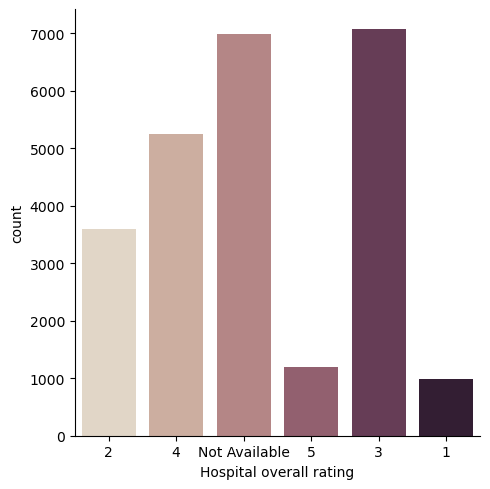

In [5]:
sns.catplot(data=data, x="Hospital overall rating", kind="count", palette="ch:.25")

In [ ]:
Average hospital rating by Hospital ownership 

In [4]:


data['Hospital overall rating'] = data['Hospital overall rating'].replace('Not Available', np.nan)

data['Hospital overall rating'] = pd.to_numeric(data['Hospital overall rating'])
data['Hospital Ownership'].value_counts()

data_groups = data.groupby(['Hospital Ownership'])['Hospital overall rating'].mean()

data_groups.head(10)

type(data_groups)


pandas.core.series.Series

<AxesSubplot:xlabel='Hospital Ownership'>

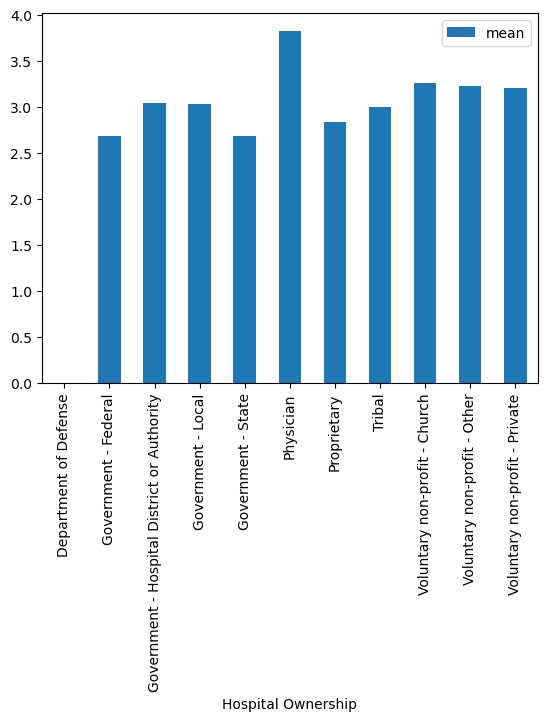

In [8]:
##data_groups.plot.bar()   

## alternatively 

data.groupby(['Hospital Ownership'])['Hospital overall rating'].agg(['mean']).plot.bar()

Using seaborn package


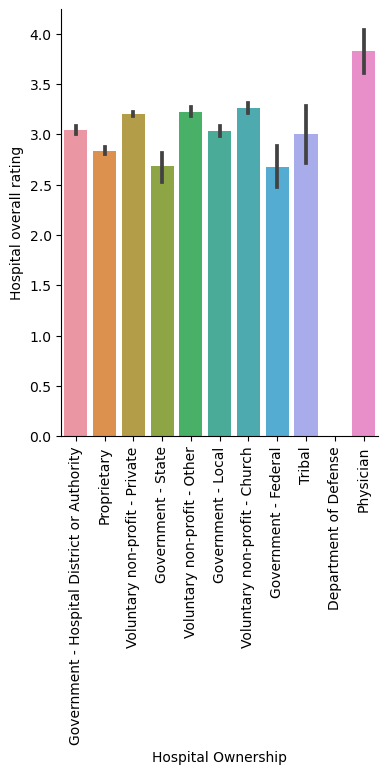

In [36]:
sns.catplot(data=data, x="Hospital Ownership", y="Hospital overall rating", kind="bar")

plt.xticks(rotation=90)

plt.show()
